In [10]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor

In [5]:
import yfinance as yf

# Get USD/EUR data (EURUSD=X)
eur_usd = yf.download("EURUSD=X", start="2000-01-01", end="2025-01-01")

# Get USD/INR data (INR=X)
usd_inr = yf.download("INR=X", start="2000-01-01", end="2025-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
## inverting to get EUR/USD
eur_usd['Close'] = 1/eur_usd['Close']
eur_usd['High'] = 1/eur_usd['High']
eur_usd['Low'] = 1/eur_usd['Low']
eur_usd['Open'] = 1/eur_usd['Open']

eur_usd.to_csv("./Raw Data/usd_eur_forex.csv")
usd_inr.to_csv("./Raw Data/usd_inr_forex.csv")
print("Data saved successfully")


Data saved successfully


In [12]:
usd_eur = pd.read_csv("./Raw Data/usd_eur_forex.csv",index_col='Date',parse_dates=True)
usd_inr = pd.read_csv("./Raw Data/usd_inr_forex.csv",index_col='Date',parse_dates=True)

print("USD/EUR Data:")
print(usd_eur.head())
print("\n USD/INR Data :")
print(usd_inr.head())


USD/EUR Data:
               Close      High       Low      Open  Volume
Date                                                      
01-12-2003  1.196501  1.204007  1.194401  1.203398       0
02-12-2003  1.208897  1.210903  1.194600  1.196101       0
03-12-2003  1.212298  1.213003  1.207700  1.209000       0
04-12-2003  1.208094  1.214403  1.204398  1.212004       0
05-12-2003  1.218695  1.219096  1.206593  1.207802       0

 USD/INR Data :
                Close       High        Low       Open  Volume
Date                                                          
01-12-2003  45.709999  45.728001  45.615002  45.709000       0
02-12-2003  45.629002  45.719002  45.560001  45.709000       0
03-12-2003  45.549999  45.655998  45.474998  45.632000       0
04-12-2003  45.548000  45.612999  45.519001  45.548000       0
05-12-2003  45.449001  45.566002  45.449001  45.549999       0


## Basic Statistics


In [13]:
print("USD/EUR summary stats :")
print(usd_eur.describe())

print("\nUSD/INR summary stats :")

print(usd_inr.describe())

USD/EUR summary stats :
             Close         High          Low         Open  Volume
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.0
mean      1.229351     1.233847     1.224391     1.229328     0.0
std       0.128107     0.128907     0.128326     0.128111     0.0
min       0.959619     0.967006     0.072902     0.959619     0.0
25%       1.117843     1.121240     1.113800     1.117818     0.0
50%       1.215407     1.219007     1.210419     1.215495     0.0
75%       1.324696     1.330021     1.318913     1.324538     0.0
max       1.598798     1.602821     1.587402     1.598184     0.0

USD/INR summary stats :
             Close         High          Low         Open  Volume
count  5470.000000  5470.000000  5470.000000  5470.000000  5470.0
mean     60.055872    60.252435    59.874918    60.054572     0.0
std      13.894931    13.900044    13.850217    13.885135     0.0
min      39.044998    39.235001    38.979000    38.995998     0.0
25%      45.767249    45.88

In [18]:
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5470 entries, 01-12-2003 to 31-12-2024
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5470 non-null   float64
 1   High    5470 non-null   float64
 2   Low     5470 non-null   float64
 3   Open    5470 non-null   float64
 4   Volume  5470 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 256.4+ KB


In [19]:
usd_eur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5473 entries, 01-12-2003 to 31-12-2024
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5473 non-null   float64
 1   High    5473 non-null   float64
 2   Low     5473 non-null   float64
 3   Open    5473 non-null   float64
 4   Volume  5473 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 256.5+ KB


#### finding missing values

In [14]:
print("USD/EUR dataset missing values :")
print(usd_eur.isnull().sum())

print("\nUSD/INR dataset missing values :")

print(usd_inr.isnull().sum())

USD/EUR dataset missing values :
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

USD/INR dataset missing values :
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


No missing values in our dataset

## Time Series Plot

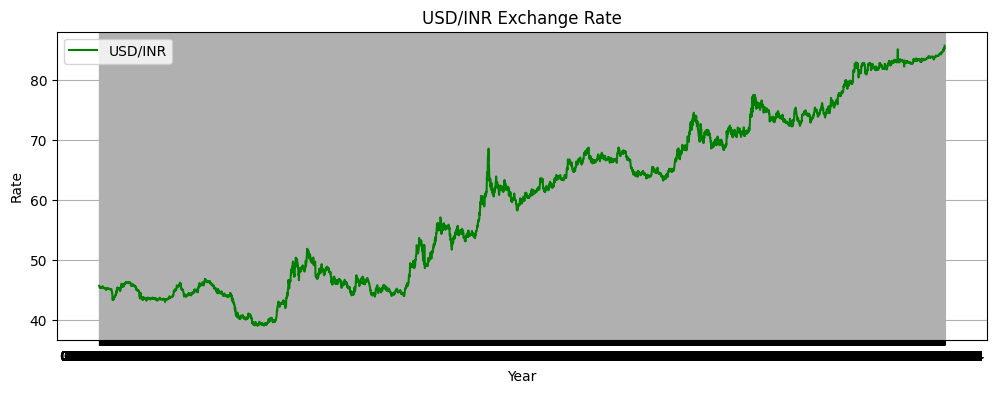

In [25]:
# Plot USD/INR alone
plt.figure(figsize=(12, 4))
plt.plot(usd_inr.index, usd_inr["Close"], color="green", label="USD/INR")
plt.title("USD/INR Exchange Rate")
plt.xlabel("Year")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()

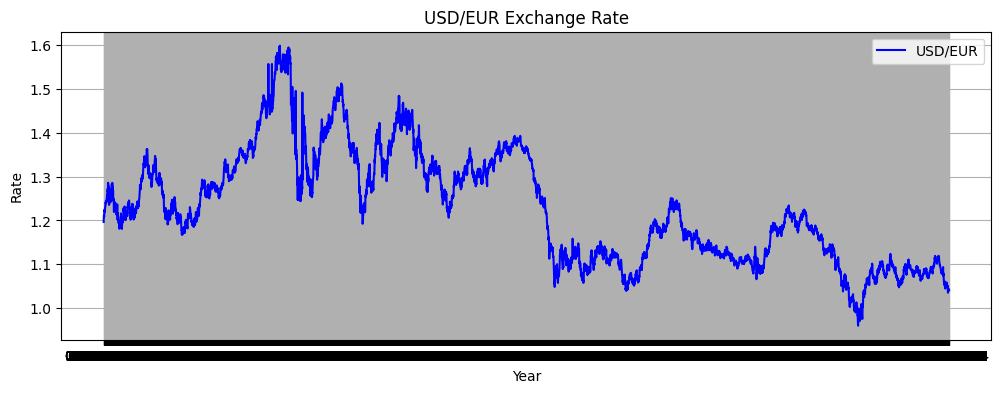

In [23]:
plt.figure(figsize=(12,4))
plt.plot(usd_eur['Close'],label='USD/EUR',color="blue")
plt.title("USD/EUR Exchange Rate")
plt.xlabel("Year")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()

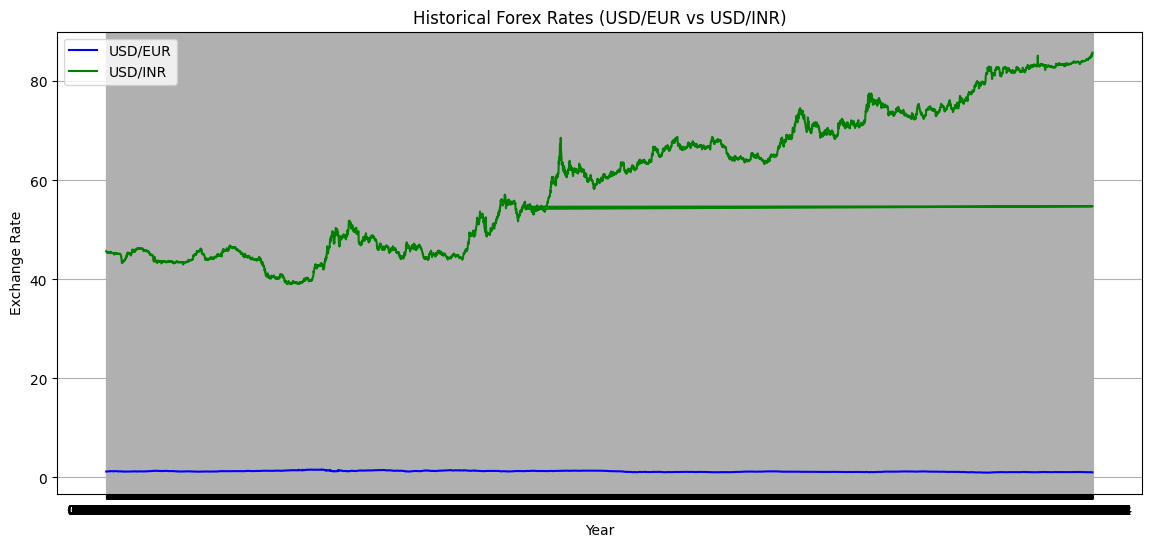

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(usd_eur['Close'],label='USD/EUR',color="blue")
plt.plot(usd_inr['Close'],label = "USD/INR",color = "green")
plt.title("Historical Forex Rates (USD/EUR vs USD/INR)")
plt.xlabel("Year")
plt.ylabel("Exchange Rate")
plt.xticks()
plt.legend()
plt.grid()

plt.show()

The USD/INR exchange rate is much greater than USD/EUR rate so let's normalize it to view the actual trend


Let's Take the moving average of the data so as to smoothen the trend

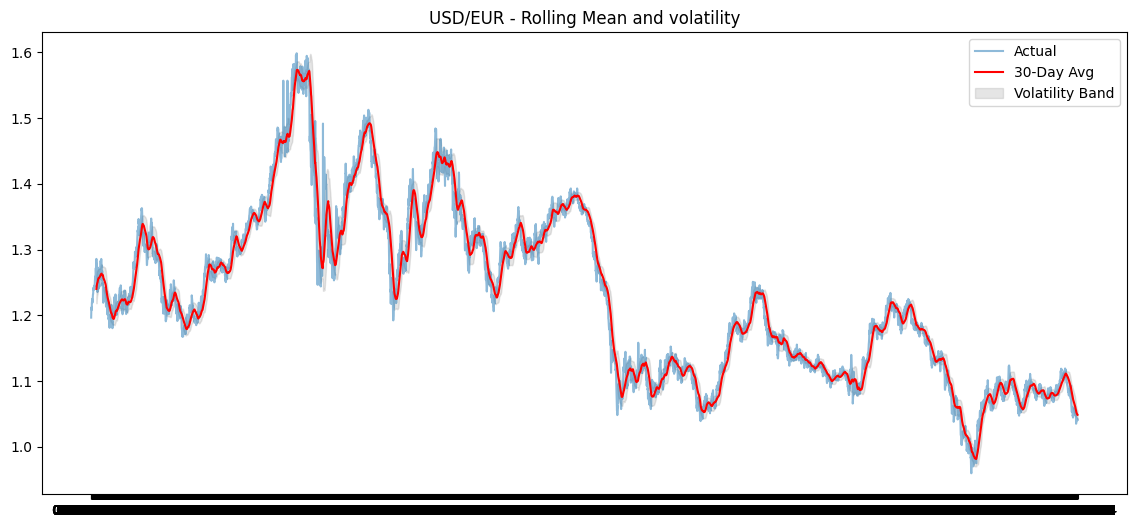

In [29]:
usd_eur['30_day_avg'] = usd_eur['Close'].rolling(window=30).mean()
usd_inr['30_day_avg'] = usd_inr['Close'].rolling(window=30).mean()
usd_eur['30_day_std'] = usd_eur['Close'].rolling(window=30).std()
usd_inr['30_day_std'] = usd_inr['Close'].rolling(window=30).std()
plt.figure(figsize=(14,6))
plt.plot(usd_eur["Close"],label="Actual",alpha=0.5)
plt.plot(usd_eur['30_day_avg'],label = '30-Day Avg',color='red')
plt.fill_between(
    usd_eur.index,
    usd_eur['30_day_avg']-usd_eur['30_day_std'],
    usd_eur['30_day_avg']+usd_eur['30_day_std'],
    alpha=0.2,
    color='gray',
    label='Volatility Band'
)
plt.title("USD/EUR - Rolling Mean and volatility")
plt.legend()
plt.show()


In [43]:
usd_eur.index = pd.to_datetime(usd_eur.index,format="%d-%m-%Y")

In [48]:
eur_2008 = usd_eur[(usd_eur.index >= '2008-01-01')&(usd_eur.index <= '2008-12-31')]
eur_2008.tail()

,Close,High,Low,Open,Volume,30_day_avg,30_day_std
Date,,,,,,,
2008-12-25,1.401502,1.414007,1.398406,1.400697,0,1.324057,0.069189
2008-12-26,1.402702,1.411293,1.399482,1.401601,0,1.328823,0.069528
2008-12-29,1.403903,1.435998,1.392506,1.410596,0,1.333473,0.069735
2008-12-30,1.414007,1.422010,1.400207,1.403548,0,1.338484,0.069948
2008-12-31,1.397995,1.414507,1.385502,1.413607,0,1.343399,0.068725


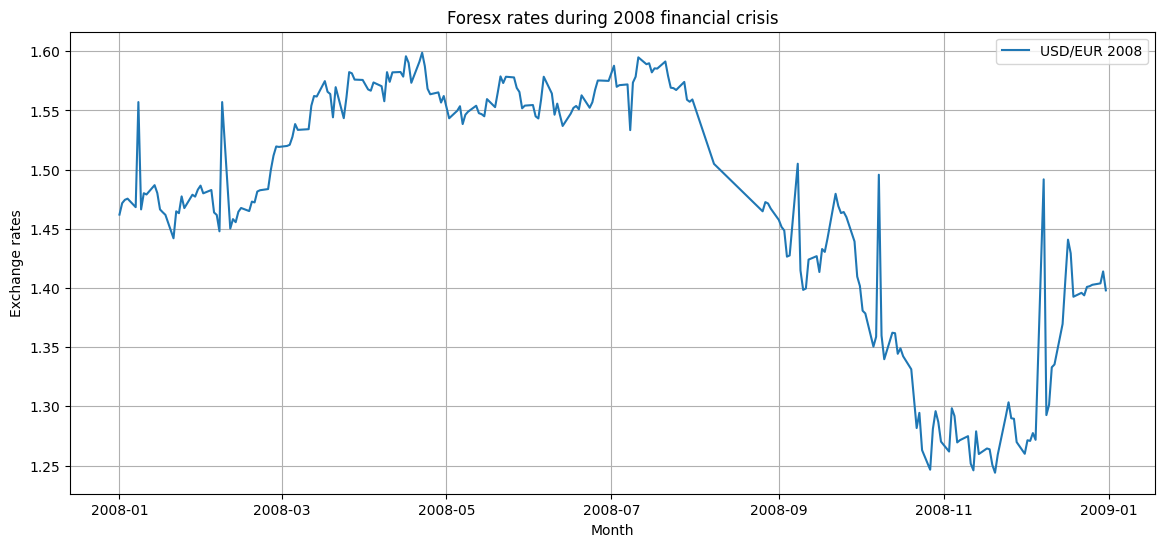

In [49]:
plt.figure(figsize=(14,6))
plt.plot(eur_2008.index,eur_2008['Close'],label='USD/EUR 2008')
plt.title("Foresx rates during 2008 financial crisis")
plt.xlabel("Month")
plt.ylabel("Exchange rates")
plt.legend()
plt.grid()
plt.show()

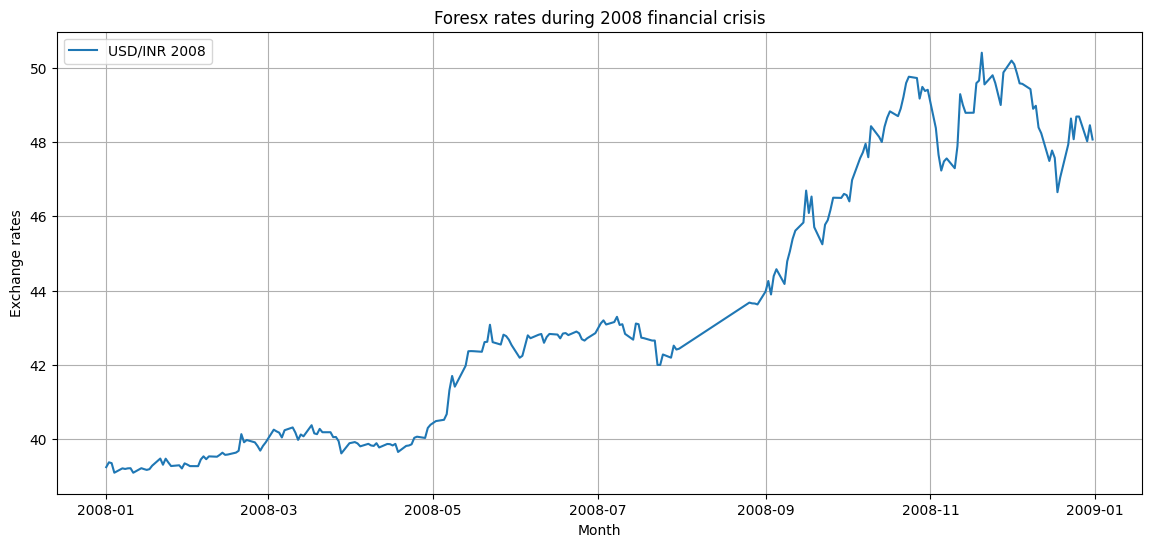

In [50]:
usd_inr.index = pd.to_datetime(usd_inr.index,format="%d-%m-%Y")
inr_2008 = usd_inr[(usd_inr.index >= '2008-01-01')&(usd_inr.index<='2008-12-31')]
plt.figure(figsize=(14,6))
plt.plot(inr_2008.index,inr_2008['Close'],label='USD/INR 2008')
plt.title("Foresx rates during 2008 financial crisis")
plt.xlabel("Month")
plt.ylabel("Exchange rates")
plt.legend()
plt.grid()
plt.show()

In [51]:
forex_merged = pd.merge(usd_eur['Close'],usd_inr['Close'],on="Date",suffixes=("_EUR","_INR"))
forex_merged.head()

,Close_EUR,Close_INR
Date,,
2003-12-01,1.196501,45.709999
2003-12-02,1.208897,45.629002
2003-12-03,1.212298,45.549999
2003-12-04,1.208094,45.548000
2003-12-05,1.218695,45.449001


In [52]:
corr = forex_merged.corr()
print("Correlation between usd_eur and usd_inr")
print(corr)

Correlation between usd_eur and usd_inr
           Close_EUR  Close_INR
Close_EUR   1.000000  -0.789035
Close_INR  -0.789035   1.000000


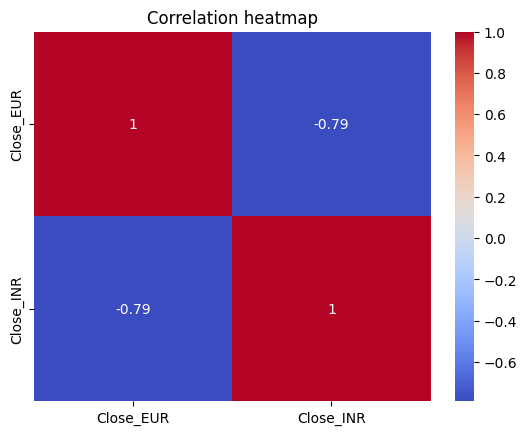

In [58]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [ ]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------- ----------------------------- 2.6/9.9 MB 13.7 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.9 MB 12.6 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.9 MB 12.9 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/9.9 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 9.3 MB/s eta 0:00:00


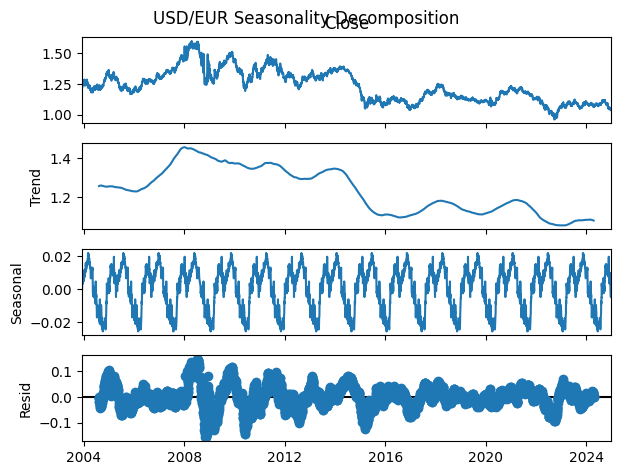

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose USD/EUR
decomposition = seasonal_decompose(usd_eur["Close"].dropna(), period=365)  # Yearly seasonality
decomposition.plot()
plt.suptitle("USD/EUR Seasonality Decomposition")
plt.show()

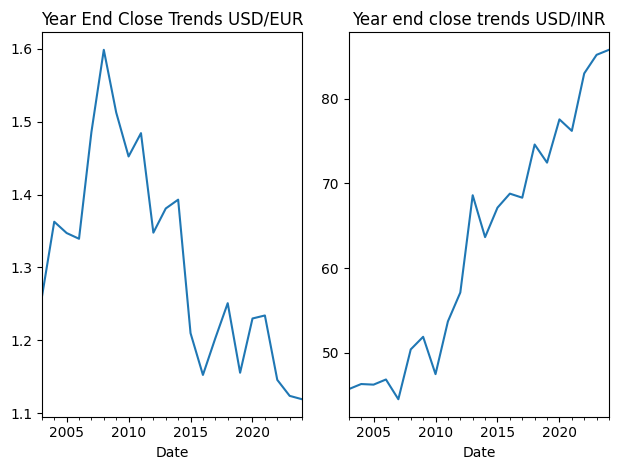

In [61]:

plt.subplot(1,2,1)
plt.tight_layout()
plt.title('Year End Close Trends USD/EUR')
forex_merged.resample(rule='A').max()['Close_EUR'].plot()

plt.subplot(1,2,2)
plt.tight_layout()
plt.title('Year end close trends USD/INR')
forex_merged.resample(rule='A').max()['Close_INR'].plot()
plt.show()

## Let's start with feature Engineering

In [63]:
df = usd_eur.copy()
df.head()


,Close,High,Low,Open,Volume,30_day_avg,30_day_std
Date,,,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0,NaN,NaN
2003-12-02,1.208897,1.210903,1.194600,1.196101,0,NaN,NaN
2003-12-03,1.212298,1.213003,1.207700,1.209000,0,NaN,NaN
2003-12-04,1.208094,1.214403,1.204398,1.212004,0,NaN,NaN
2003-12-05,1.218695,1.219096,1.206593,1.207802,0,NaN,NaN


In [64]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['day_of_week'] = df.index.day_of_week

df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)
df.head()

,Close,High,Low,Open,Volume,30_day_avg,30_day_std,day,month,year,day_of_week,is_weekend
Date,,,,,,,,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0,NaN,NaN,1,12,2003,0,0
2003-12-02,1.208897,1.210903,1.194600,1.196101,0,NaN,NaN,2,12,2003,1,0
2003-12-03,1.212298,1.213003,1.207700,1.209000,0,NaN,NaN,3,12,2003,2,0
2003-12-04,1.208094,1.214403,1.204398,1.212004,0,NaN,NaN,4,12,2003,3,0
2003-12-05,1.218695,1.219096,1.206593,1.207802,0,NaN,NaN,5,12,2003,4,0


# Adding lag features

In [65]:
df['lag_1'] = df['Close'].shift(1)
df['lag_7'] = df['Close'].shift(7)
df['lag_30'] = df['Close'].shift(30)
df.fillna(method='bfill',inplace=True)
df = df.drop(columns=['30_day_avg','30_day_std'])
df.head()

,Close,High,Low,Open,Volume,day,month,year,day_of_week,is_weekend,lag_1,lag_7,lag_30
Date,,,,,,,,,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0,1,12,2003,0,0,1.196501,1.196501,1.196501
2003-12-02,1.208897,1.210903,1.194600,1.196101,0,2,12,2003,1,0,1.196501,1.196501,1.196501
2003-12-03,1.212298,1.213003,1.207700,1.209000,0,3,12,2003,2,0,1.208897,1.196501,1.196501
2003-12-04,1.208094,1.214403,1.204398,1.212004,0,4,12,2003,3,0,1.212298,1.196501,1.196501
2003-12-05,1.218695,1.219096,1.206593,1.207802,0,5,12,2003,4,0,1.208094,1.196501,1.196501


## Rolling window stats

In [ ]:
df['rolling_mean_7'] = df['Close'].rolling(window=7).mean()
df['rolling_mean_30'] = df['Close'].rolling(window=30).mean()

df['rolling_std_7'] = df['Close'].rolling(window=7).std()
df['rolling_std_30'] = df['Close'].rolling(window=30).std()

df['upper_band'] = df['rolling_mean_30'] + (2*df['rolling_std_30'])
df['lower_band'] = df['rolling_mean_30'] - (2*df['rolling_std_30'])

,Close,High,Low,Open,Volume,day,month,year,day_of_week,is_weekend,lag_1,lag_7,lag_30,rolling_mean_7,rolling_mean_30,rolling_std_7,rolling_std_30,upper_band,lower_band
Date,,,,,,,,,,,,,,,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0,1,12,2003,0,0,1.196501,1.196501,1.196501,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,1.208897,1.210903,1.194600,1.196101,0,2,12,2003,1,0,1.196501,1.196501,1.196501,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-03,1.212298,1.213003,1.207700,1.209000,0,3,12,2003,2,0,1.208897,1.196501,1.196501,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-04,1.208094,1.214403,1.204398,1.212004,0,4,12,2003,3,0,1.212298,1.196501,1.196501,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-05,1.218695,1.219096,1.206593,1.207802,0,5,12,2003,4,0,1.208094,1.196501,1.196501,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-08,1.222001,1.224005,1.215407,1.216797,0,8,12,2003,0,0,1.218695,1.196501,1.196501,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-09,1.224995,1.227702,1.219795,1.222105,0,9,12,2003,1,0,1.222001,1.196501,1.196501,1.213069,NaN,0.009754,NaN,NaN,NaN
2003-12-10,1.219096,1.226603,1.216205,1.224905,0,10,12,2003,2,0,1.224995,1.196501,1.196501,1.216297,NaN,0.006580,NaN,NaN,NaN
2003-12-11,1.222404,1.223496,1.212298,1.219096,0,11,12,2003,3,0,1.219096,1.208897,1.196501,1.218226,NaN,0.006004,NaN,NaN,NaN


# Technical Indicators

In [67]:
!pip install ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29496 sha256=142700eb32b4548c8b39a60ab0db40f400f9b3c69e1dbc7613dcfa296bc8b71f
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\61\d8\66\8018676d483fa5edb5337a7a25ee8c029ac255be25f90f3cd5
Successfully built ta


In [69]:
from ta.trend import MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands

df['rsi_14'] = RSIIndicator(df['Close'],window=14).rsi()
macd = MACD(df['Close'])
df['macd_line'] = macd.macd()
df['macd_signal'] = macd.macd_signal()

bb = BollingerBands(df['Close'])
df['bb_high'] = bb.bollinger_hband()
df['bb_low'] = bb.bollinger_lband()

df.head()

,Close,High,Low,Open,Volume,day,month,year,day_of_week,is_weekend,lag_1,lag_7,lag_30,rolling_mean_7,rolling_mean_30,rolling_std_7,rolling_std_30,upper_band,lower_band,rsi_14,macd_line,macd_signal,bb_high,bb_low
Date,,,,,,,,,,,,,,,,,,,,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0,1,12,2003,0,0,1.196501,1.196501,1.196501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,1.208897,1.210903,1.194600,1.196101,0,2,12,2003,1,0,1.196501,1.196501,1.196501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-03,1.212298,1.213003,1.207700,1.209000,0,3,12,2003,2,0,1.208897,1.196501,1.196501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-04,1.208094,1.214403,1.204398,1.212004,0,4,12,2003,3,0,1.212298,1.196501,1.196501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-05,1.218695,1.219096,1.206593,1.207802,0,5,12,2003,4,0,1.208094,1.196501,1.196501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df['daily_return'] = df['Close'].pct_change()*100
df['log_return'] = np.log(df['Close']/df['Close'].shift(1))
df['price_diff'] = df['Close'].diff() # price difference from previous day

#### Let's create a target feataure for supervised learning

In [71]:
df['target'] = df['Close'].shift(-1)
df['target_direction'] = (df['Close'].shift(-1)>df['Close']).astype(int)

In [72]:
df.dropna(inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = df.drop(["target","target_direction"],axis=1,errors="ignore")
df_scaled = pd.DataFrame(scaler.fit_transform(features),columns = features.columns,index=df.index)
df_scaled['target'] = df['target']

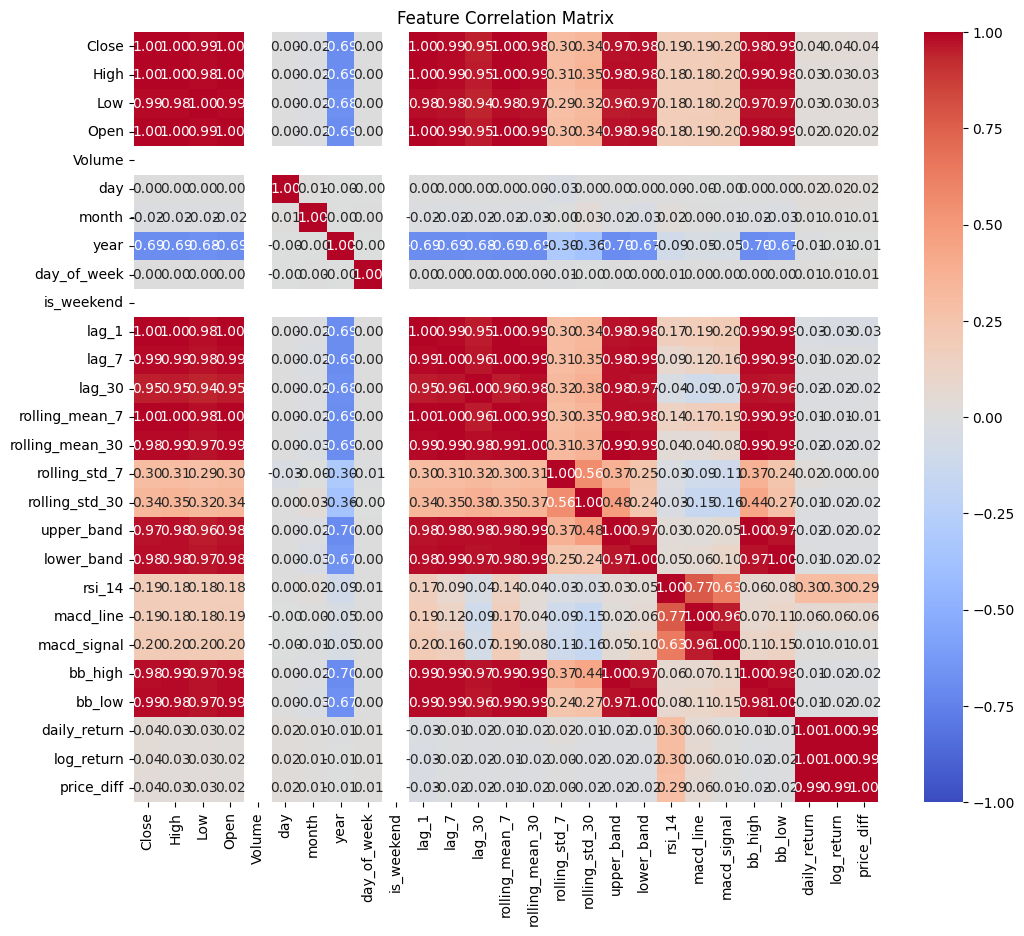

In [74]:
features = df_scaled.drop("target", axis=1, errors="ignore")

# Calculate correlation matrix
corr_matrix = features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

In [75]:
threshold = 0.85
high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:
            colname = corr_matrix.columns[i]
            high_corr.add(colname)

print(f"Features to remove (correlation > {threshold}): ")
print(high_corr)


Features to remove (correlation > 0.85): 
{'rolling_mean_7', 'upper_band', 'lag_1', 'bb_high', 'Open', 'Low', 'rolling_mean_30', 'log_return', 'bb_low', 'price_diff', 'lag_7', 'lag_30', 'macd_signal', 'lower_band', 'High'}


In [76]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 14.0 MB/s eta 0:00:00


In [77]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

k_features = 15
sfs = SequentialFeatureSelector(
    LinearRegression(),
    k_features=k_features,
    forward = False,
    scoring = 'neg_mean_squared_error',
    cv = 5
)
sfs.fit(features,df_scaled['target'])
selected_features = list(sfs.k_feature_names_)
df_filtered = df_scaled[selected_features+['target']]

df_filtered.head()

,High,Open,Volume,month,day_of_week,is_weekend,lag_1,lag_30,rolling_std_7,rolling_std_30,upper_band,lower_band,bb_low,daily_return,log_return,target
Date,,,,,,,,,,,,,,,,
2004-01-15,0.471993,0.479167,0.0,0.0,0.75,0.0,0.477931,0.388741,0.101824,0.239757,0.434934,0.433437,0.455790,0.422594,0.459999,1.239803
2004-01-16,0.462393,0.470402,0.0,0.0,1.00,0.0,0.470099,0.405326,0.174808,0.228740,0.433686,0.437162,0.456203,0.382972,0.419492,1.235407
2004-01-19,0.433145,0.437039,0.0,0.0,0.00,0.0,0.438349,0.410498,0.220111,0.221085,0.432755,0.439680,0.454717,0.423935,0.461361,1.258907
2004-01-20,0.461143,0.431408,0.0,0.0,0.25,0.0,0.431472,0.415182,0.184541,0.213064,0.432796,0.443429,0.458458,0.497540,0.535283,1.265903
2004-01-21,0.471816,0.467423,0.0,0.0,0.50,0.0,0.468238,0.405953,0.172255,0.200434,0.432524,0.448964,0.461314,0.453625,0.491378,1.272508


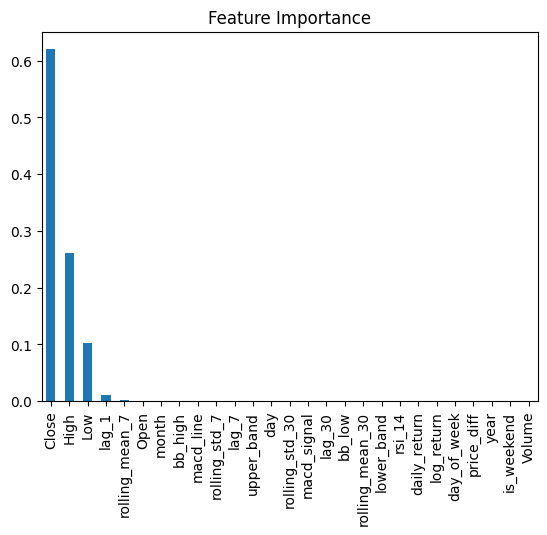

In [78]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(features, df_scaled["target"])
importance = pd.Series(model.feature_importances_, index=features.columns)
importance.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance")
plt.show()